## ライブラリ読み込み

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests
from time import sleep

In [3]:
# サッカー試合結果まとめサイト
# 2012-2018までデータが存在
# url = 'http://www.football-lab.jp/ka-f/match/?year=2017'
# url = 'http://www.football-lab.jp/ka-f/match/'

## データ読み込み

In [4]:
# チーム名読み込み
df_tm = pd.read_csv('team.csv',sep=',', encoding="utf_8")
tm_list = df_tm.iloc[:,0]
tm_url_list = df_tm.iloc[:,3]

In [82]:
# 空のDataFrameを作成
url = 'http://soccer.from.tv/team/276/y17/'
data = pd.io.html.read_html(url)[3]
df_raw = DataFrame(data)
df = pd.DataFrame(columns = df_raw.iloc[0,0:])
df['tm']=''

for i_year in range(1):

#         test
    obs_tm = 953

    # 対戦情報を取得
    print(obs_tm)
    year = i_year+12
    url = 'http://soccer.from.tv/team/{}/y{}/'.format(obs_tm, year)
    print(url)

    data = pd.io.html.read_html(url)[3]
    df_raw = DataFrame(data)
    df2=df_raw.iloc[1:,0:]
    df2.columns = df_raw.iloc[0,0:]

    # タイトルを取得
    result = requests.get(url)
    c = result.content
    soup = BeautifulSoup(c, "html.parser")
    tm = soup.find("div", attrs={"class": "page_title"}).b.string
    df2['tm']=tm

    df = df.append(df2)

    #0.5秒時間を置く
    sleep(0.5)

df

953
http://soccer.from.tv/team/953/y12/


,FC東京,H/A,J1,J公式,SH,tm,スコア,仙台,天候,川崎F,...,柏,横浜FM,浦和,湘南,相手,節/回戦,被SH,試合,試合会場,鹿島
1,広島,NaN,清水,NaN,NaN,山口,NaN,名古屋,NaN,鳥栖,...,神戸,長崎,C大阪,NaN,NaN,NaN,NaN,NaN,NaN,G大阪


In [ ]:
# 空のDataFrameを作成
url = 'http://soccer.from.tv/team/276/y17/'
data = pd.io.html.read_html(url)[3]
df_raw = DataFrame(data)
df = pd.DataFrame(columns = df_raw.iloc[0,0:])
df['tm']=''


# 対戦結果データのスクレイピング
for obs_tm in tm_url_list: 
#     for i_year in range(7):
    for i_year in range(1):
        
        # 対戦情報を取得
        print(obs_tm)
        year = i_year+12
        url = 'http://soccer.from.tv/team/{}/y{}/'.format(obs_tm, year)
        print(url)

        # 2012/953のデータが存在しない
        if obs_tm != 953:        
            data = pd.io.html.read_html(url)[3]
            df_raw = DataFrame(data)
            df2=df_raw.iloc[1:,0:]
            df2.columns = df_raw.iloc[0,0:]

            # タイトルを取得
            result = requests.get(url)
            c = result.content
            soup = BeautifulSoup(c, "html.parser")
            tm = soup.find("div", attrs={"class": "page_title"}).b.string
            df2['tm']=tm

            df = df.append(df2)
        
        else:
            print(skip)
        
        #0.5秒時間を置く
        sleep(0.5)

In [88]:
df

,FC東京,H/A,J1,J公式,SH,tm,スコア,仙台,天候,川崎F,...,柏,横浜FM,浦和,湘南,相手,節/回戦,被SH,試合,試合会場,鹿島
1,NaN,A,NaN,詳細,6,札幌,● 1 - 4,NaN,雨,NaN,...,NaN,NaN,NaN,NaN,新潟,第34節,18,J1,東北電ス,NaN
2,NaN,H,NaN,詳細,3,札幌,● 0 - 2,NaN,屋内,NaN,...,NaN,NaN,NaN,NaN,横浜FM,第33節,18,J1,札幌ド,NaN
3,NaN,H,NaN,詳細,11,札幌,● 2 - 3,NaN,屋内,NaN,...,NaN,NaN,NaN,NaN,鳥栖,第32節,17,J1,札幌ド,NaN
4,NaN,A,NaN,詳細,4,札幌,● 0 - 3,NaN,晴,NaN,...,NaN,NaN,NaN,NaN,広島,第31節,19,J1,広島ビ,NaN
5,NaN,A,NaN,詳細,9,札幌,● 0 - 5,NaN,晴,NaN,...,NaN,NaN,NaN,NaN,FC東京,第30節,18,J1,味スタ,NaN
6,NaN,H,NaN,詳細,5,札幌,△ 0 - 0,NaN,曇時々雨,NaN,...,NaN,NaN,NaN,NaN,鹿島,第29節,17,J1,札幌厚別,NaN
7,NaN,A,NaN,詳細,9,札幌,○ 2 - 1,NaN,晴,NaN,...,NaN,NaN,NaN,NaN,浦和,第28節,17,J1,埼玉,NaN
8,NaN,A,NaN,詳細,6,札幌,● 0 - 1,NaN,晴,NaN,...,NaN,NaN,NaN,NaN,川崎F,第27節,20,J1,等々力,NaN
9,NaN,H,NaN,詳細,3,札幌,● 0 - 5,NaN,晴のち雨,NaN,...,NaN,NaN,NaN,NaN,大宮,第26節,17,J1,札幌厚別,NaN
10,NaN,A,NaN,詳細,9,札幌,● 1 - 3,NaN,晴,NaN,...,NaN,NaN,NaN,NaN,柏,第25節,23,J1,柏,NaN


In [34]:
df

,年月日,試合,節/回戦,H/A,スコア,相手,SH,被SH,天候,試合会場,J公式,tm
1,2012/11/11,J2,第42節,H,● 0 - 2,岡山,8,10,曇,ＮＤスタ,詳細,山形
2,2012/11/04,J2,第41節,A,● 0 - 3,大分,6,14,曇,大銀ド,詳細,山形
3,2012/10/28,J2,第40節,H,● 0 - 2,千葉,10,10,雨,ＮＤスタ,詳細,山形
4,2012/10/21,J2,第39節,H,○ 1 - 0,北九州,10,8,晴のち曇,ＮＤスタ,詳細,山形
5,2012/10/14,J2,第38節,A,△ 0 - 0,岐阜,8,4,曇,長良川球,詳細,山形
6,2012/10/10,天皇杯,3回戦,A,● 1 - 2,C大阪,16,13,曇,金鳥スタ,NaN,山形
7,2012/10/07,J2,第37節,H,● 0 - 2,熊本,3,15,晴,ＮＤスタ,詳細,山形
8,2012/09/30,J2,第36節,H,△ 1 - 1,東京V,15,8,晴,ＮＤスタ,詳細,山形
9,2012/09/23,J2,第35節,A,● 1 - 3,草津,15,7,雨,正田スタ,詳細,山形
10,2012/09/17,J2,第34節,H,● 1 - 2,京都,11,14,晴,ＮＤスタ,詳細,山形


In [7]:
df = df[[
    '年月日', 
    '試合',
    '節/回戦',
    'H/A',
    'スコア',
    '相手',
    'SH',
    '被SH',
    '天候',
    '試合会場',
    'J公式',
    'tm'
]]

In [8]:
df=df[df["年月日"].notnull()]

In [9]:
# 試合結果フラグを作成
df.loc[df['スコア'].str.contains('○'),'match_result'] = 'W'
df.loc[df['スコア'].str.contains('●'),'match_result'] = 'L'
df.loc[df['スコア'].str.contains('△'),'match_result'] = 'D'


In [10]:
df

,年月日,試合,節/回戦,H/A,スコア,相手,SH,被SH,天候,試合会場,J公式,tm,match_result
1,2012/11/11,J2,第42節,H,● 0 - 1,東京V,10,8,曇,正田スタ,詳細,群馬,L
2,2012/11/04,J2,第41節,A,● 1 - 3,愛媛,4,8,曇,ニンスタ,詳細,群馬,L
3,2012/10/28,J2,第40節,A,● 0 - 3,横浜FC,5,16,雨,ニッパツ,詳細,群馬,L
4,2012/10/21,J2,第39節,H,○ 1 - 0,岡山,17,12,晴,正田スタ,詳細,群馬,W
5,2012/10/14,J2,第38節,H,△ 0 - 0,水戸,8,9,晴,正田スタ,詳細,群馬,D
6,2012/10/07,J2,第37節,A,● 0 - 2,千葉,8,21,晴,フクアリ,詳細,群馬,L
7,2012/09/30,J2,第36節,A,● 0 - 2,鳥取,12,12,雨,とりスタ,詳細,群馬,L
8,2012/09/23,J2,第35節,H,○ 3 - 1,山形,7,15,雨,正田スタ,詳細,群馬,W
9,2012/09/17,J2,第34節,H,● 0 - 1,富山,6,9,曇,正田スタ,詳細,群馬,L
10,2012/09/14,J2,第33節,A,● 0 - 2,湘南,3,13,晴,ＢＭＷス,詳細,群馬,L


In [19]:
# 試合結果フラグを作成
df.loc[df['スコア'].str.contains('○'),'match_result'] = 'W'
df.loc[df['スコア'].str.contains('●'),'match_result'] = 'L'
df.loc[df['スコア'].str.contains('△'),'match_result'] = 'D'

# 得失点を抽出
df['goals_for'] = df['スコア'].str[2]
df['goals_against'] = df['スコア'].str[6]

# 型変換
df['goals_for'] = df['goals_for'].astype(np.int64)
df['goals_against'] = df['goals_against'].astype(np.int64)

# 得失点差を計算
df['goals_difference'] = df['goals_for'] - df['goals_against']

In [20]:
df = df.rename(columns={
    '年月日':'dte', 
    '相手':'tm_opp',
    '節/回戦':'match_round',
    'H/A':'stadium_HA',
    'SH':'sh_for',
    '被SH':'sh_against',
    '試合':'match_type',
    '天候':'weather',
    '試合会場':'stadium'
})

In [21]:
df = df.loc[:,[
    'tm'
    ,'tm_opp'
    ,'match_type'
    ,'match_round'
    ,'stadium'
    ,'stadium_HA'
    ,'dte'
    ,'match_result'
    ,'goals_difference'
    ,'goals_for'
    ,'goals_against'
    ,'weather'
#     ,'goals_player'
    ,'sh_for'
    ,'sh_against'
]]

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.to_csv('df_res.csv')

In [24]:
df

,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,群馬,東京V,J2,第42節,正田スタ,H,2012/11/11,L,-1,0,1,曇,10,8
1,群馬,愛媛,J2,第41節,ニンスタ,A,2012/11/04,L,-2,1,3,曇,4,8
2,群馬,横浜FC,J2,第40節,ニッパツ,A,2012/10/28,L,-3,0,3,雨,5,16
3,群馬,岡山,J2,第39節,正田スタ,H,2012/10/21,W,1,1,0,晴,17,12
4,群馬,水戸,J2,第38節,正田スタ,H,2012/10/14,D,0,0,0,晴,8,9
5,群馬,千葉,J2,第37節,フクアリ,A,2012/10/07,L,-2,0,2,晴,8,21
6,群馬,鳥取,J2,第36節,とりスタ,A,2012/09/30,L,-2,0,2,雨,12,12
7,群馬,山形,J2,第35節,正田スタ,H,2012/09/23,W,2,3,1,雨,7,15
8,群馬,富山,J2,第34節,正田スタ,H,2012/09/17,L,-1,0,1,曇,6,9
9,群馬,湘南,J2,第33節,ＢＭＷス,A,2012/09/14,L,-2,0,2,晴,3,13


## データ読み込み（csv）

In [3]:
df = pd.read_csv('df_res.csv',sep=',', encoding="SHIFT-JIS")

## モデル構築

In [4]:
df_sapp = df[df['tm']=='札幌']

In [5]:
df_sapp

,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,0,札幌,鳥栖,J1,第34節,札幌ド,H,2017/12/02,W,1,3,2,屋内,9,7
1,1,札幌,G大阪,J1,第33節,吹田Ｓ,A,2017/11/26,W,1,1,0,曇,5,5
2,2,札幌,清水,J1,第32節,アイスタ,A,2017/11/18,W,2,2,0,雨のち曇,7,7
3,3,札幌,鹿島,J1,第31節,札幌ド,H,2017/10/29,L,-1,1,2,屋内,4,12
4,4,札幌,FC東京,J1,第30節,味スタ,A,2017/10/21,W,1,2,1,雨,13,6
5,5,札幌,柏,J1,第29節,札幌厚別,H,2017/10/14,W,3,3,0,晴,5,11
6,6,札幌,広島,J1,第28節,Ｅスタ,A,2017/09/30,D,0,1,1,晴,10,8
7,7,札幌,新潟,J1,第27節,札幌ド,H,2017/09/23,D,0,2,2,屋内,10,12
8,8,札幌,神戸,J1,第26節,神戸ユ,A,2017/09/16,L,-2,0,2,雨,9,15
9,9,札幌,磐田,J1,第25節,札幌ド,H,2017/09/09,W,1,2,1,屋内,11,6


C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


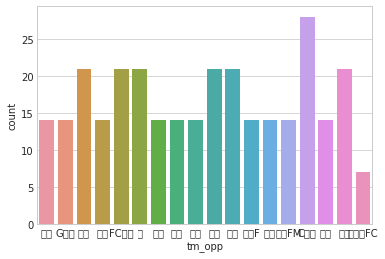

In [6]:
sns.countplot(x='tm_opp',data=df_sapp)

In [8]:
plt.rcParams['font.family'] = 'IPAGothic'

In [15]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
